In [42]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['figure.figsize'] = [20, 10]
np.random.seed(sum(map(ord, "categorical")))

In [43]:
df1 = pd.read_csv(os.getcwd() +"/Names.csv")

In [44]:
cols = df1.columns.tolist()

cols_ordered = []
cols_ordered.append('type')
cols_ordered.append('folder')
for col in cols:
    if col not in cols_ordered:
        cols_ordered.append(col)
df2 = df1[cols_ordered].dropna()
list(df2)

['type',
 'folder',
 'npm',
 'acc',
 'nom',
 'npa',
 'noa',
 'cbo',
 'amloc',
 'lcom4',
 'dit',
 'noc',
 'accm',
 '_module',
 'loc',
 '_filename',
 'anpm',
 'mmloc',
 'rfc',
 'sc']

In [45]:
df2 = df2[(df2['loc']<100) & (df2['loc']>0) & (df2['acc']<20)]
y = pd.Categorical(df2.type)
cat = list(y.categories)


In [46]:
signs = ['x','o','+','^',',','*','+']
mkr_dict = {key:signs[i] for i,key in enumerate(cat)}

<module 'matplotlib.pyplot' from '/home/alon/.virtualenvs/vealon/jupiter1/lib/python3.5/site-packages/matplotlib/pyplot.py'>

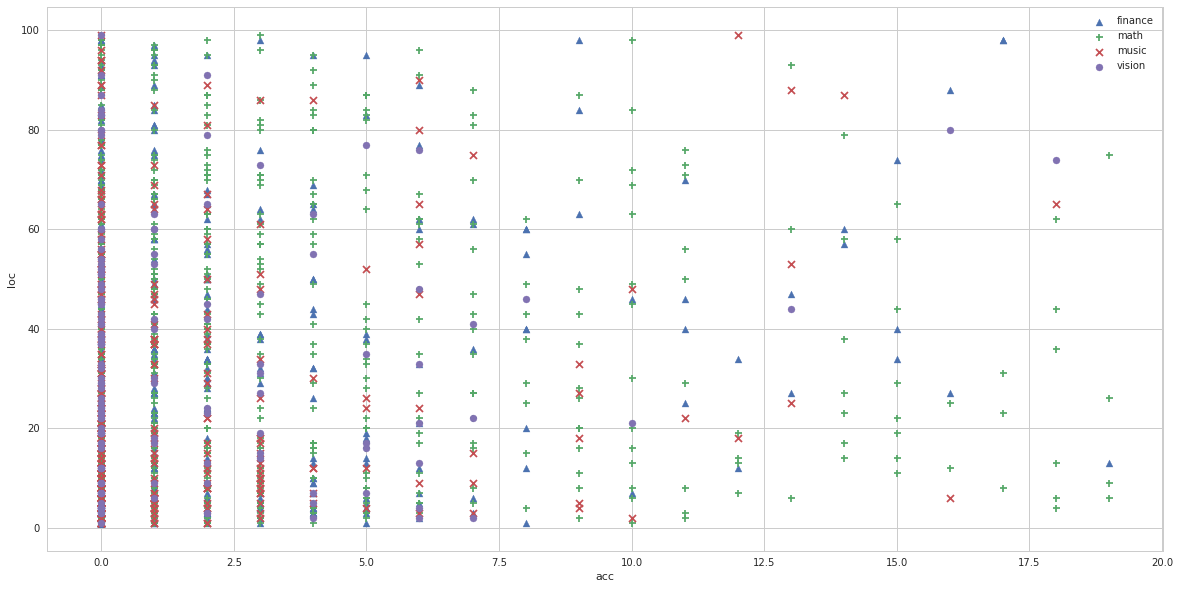

In [47]:
for kind in mkr_dict:
    d = df2[df2.type==kind]
    plt.scatter(d.acc, d['loc'],marker = mkr_dict[kind])
    plt.xlabel('acc')
    plt.ylabel('loc')
    plt.legend(cat)
plt

In [48]:
ct = pd.crosstab(index=df2.type, columns = 'count')
ct / ct.sum()

col_0,count
type,
finance,0.185446
math,0.068075
music,0.481221
vision,0.265258


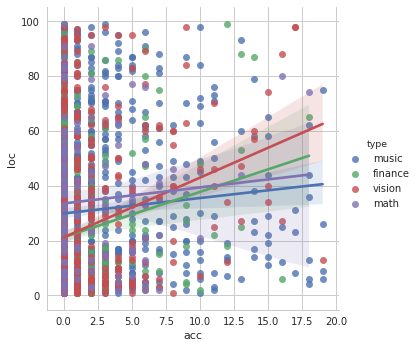

In [49]:
g = sns.lmplot(x="acc", y="loc", hue="type",
               truncate=True, size=5, data=df2)


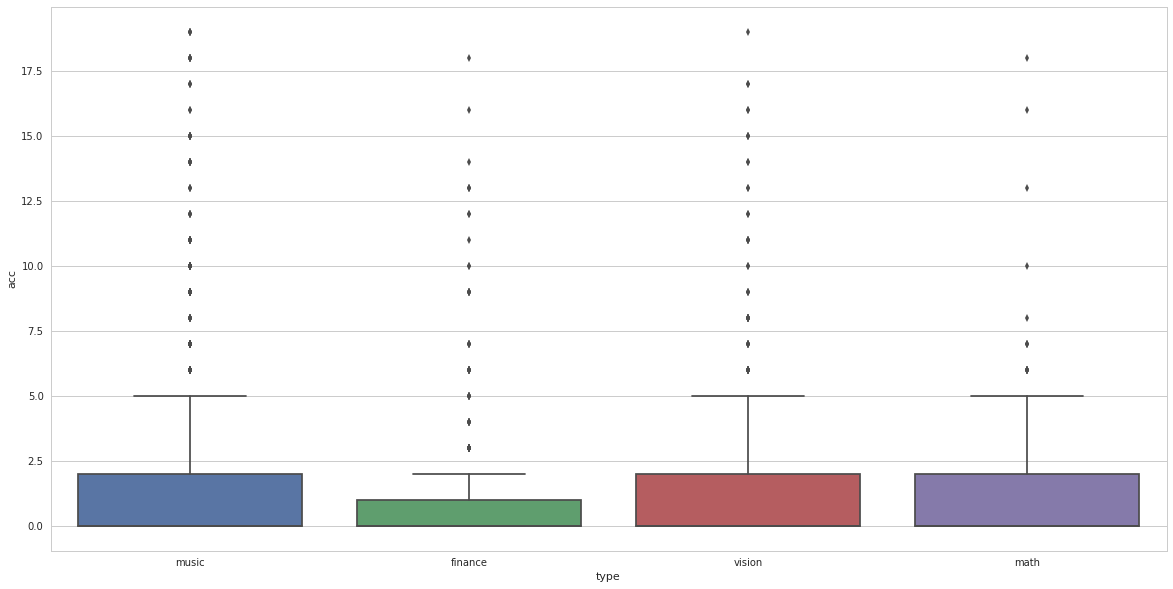

In [50]:
sns.boxplot(x='type',y='acc',data=df2)

In [51]:
corr = df2.iloc[:,1:30].copy().corr()

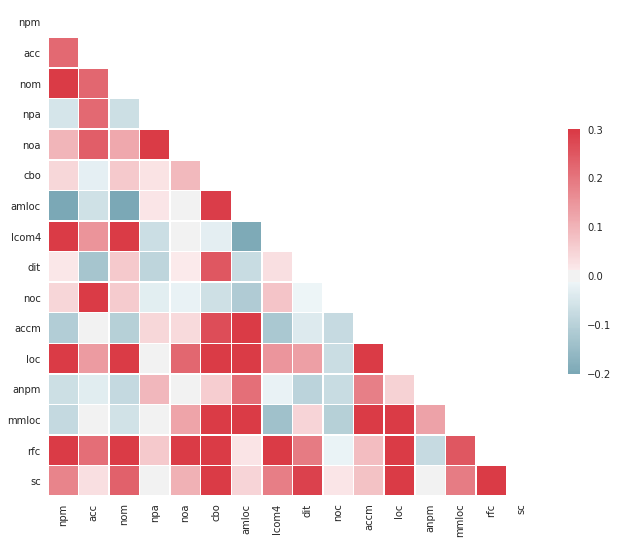

In [52]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [77]:
pca = PCA(2)
principalComponents = pca.fit_transform(df2.select_dtypes(include=[np.number]))
print (df2.shape[0])
print (principalComponents.shape[0])                

2130
2130


In [97]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
print (principalDf.shape[0])
finalDf.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
finalDf = pd.concat([principalDf, df2[['type']]], axis = 1,ignore_index=True )
finalDf[[0,2]]

2130


,0,2
0,-20.788540,music
1,-24.981967,music
2,-12.330720,music
3,49.856737,music
4,39.982803,music
5,-24.981967,music
6,20.216576,music
7,22.367790,music
8,-24.981967,music
9,49.064907,music


In [99]:
sns.lmplot('0','1',data=finalDf)

KeyError: "['0' '1'] not in index"